<a href="https://colab.research.google.com/github/rajivsresearch/General/blob/master/GDP_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simulate GDP Forecast from Q2 2030 through Q4 2021

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read a file that has the Quarter over Quarter GDP growth from Q1 2010. The data is from [OECD](https://data.oecd.org/gdp/quarterly-gdp.htm).

In [0]:
gdp = pd.read_excel('/content/Growth.xlsx')

In [13]:
gdp.head()

,Growth,Quarter,Year,GDP
0,0.38,Q1,2010,100.380000
1,0.92,Q2,2010,101.303496
2,0.74,Q3,2010,102.053142
3,0.50,Q4,2010,102.563408
4,-0.24,Q1,2011,102.317255


Initialize a new column called GDP

In [0]:
gdp.loc[:,'GDP']  = 0

Calculate GDP starting with a fictitious GDP of 100 in Quarter -1

In [0]:
for i in np.arange(0,len(gdp)):
  if i==0:
    gdp.iloc[i,3] = 100 + 100*gdp.iloc[i,0]/100
  else:
    gdp.iloc[i,3] = gdp.iloc[i-1,3] + gdp.iloc[i-1,3]*gdp.iloc[i,0]/100

Here is a plot of the calculated GDP

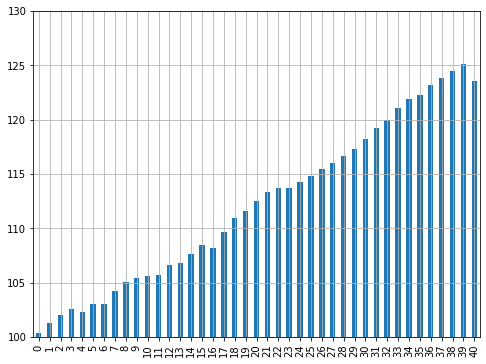

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
gdp['GDP'].plot(kind='bar', ylim=(100,130))
plt.grid()

This function will create provide fictitious GDP growth estimates over the next several quarters. Nobody knows how the GDP will fall and then rise. We will make some assumptions:

1. The function will assume an initial fall in GDP in Q2 of 2020. 
2. The function will assume that the subsequent rise in GDP will be half the growth of the previous quarter

In [0]:
def series(fall, n):
  ser = np.zeros((7))
  ser[0] = fall
  ser[1] = -1*fall/2
  for i in range(2,n):
    ser[i] = ser[i-1]/2
  return ser

So for a 10 percent drop in Q2, 2020, the growth in subsequent quarters is as follows:

In [51]:
series(-10,7)

array([-10.     ,   5.     ,   2.5    ,   1.25   ,   0.625  ,   0.3125 ,
         0.15625])

This function will calculate the GDP in the next 7 quarters and plot it

In [0]:
def simulategdp(fall):
  gdpf = pd.DataFrame(columns=gdp.columns.values, index=[41,42,43,44,45,46,47])
  gdpf['Quarter'] = ['Q2', 'Q3', 'Q4', 'Q1', 'Q2', 'Q3', 'Q4']
  gdpf['Year'] = [2020, 2020, 2020, 2021, 2021, 2021, 2021]
  gdpf['Growth'] = series(fall,7)

  for i in np.arange(0,len(gdpf)):
    if i==0:
      gdpf.iloc[i,3] = gdp.iloc[-1,3] + gdp.iloc[-1,3]*gdpf.iloc[i,0]/100
    else:
      gdpf.iloc[i,3] = gdpf.iloc[i-1,3] + gdpf.iloc[i-1,3]*gdpf.iloc[i,0]/100

  df = pd.concat([gdp,gdpf], axis=0)
  fig, ax = plt.subplots(figsize=(12,6))
  bar = df['GDP'].plot(kind='bar', ylim=(df['GDP'].min()-10,130), ax=ax, 
                                                color=list('r'*41+'b'*7))
  
  labels=df.apply(lambda x: x['Quarter'] + ' ' + str(x['Year']), axis=1)
  ax.set_xticklabels(labels)
  ax.hlines(df.loc[47,'GDP'],20,47)
  plt.title(f'GDP Forecase for next 7 Quarters assuming a 2Q fall of {fall} %')

If we assume a fall of 10 percent in Q2 2020, and a sebsequent rapid rise will result in the following plot. This will set us back to Q4 2018 after a growth of 6 quarters.

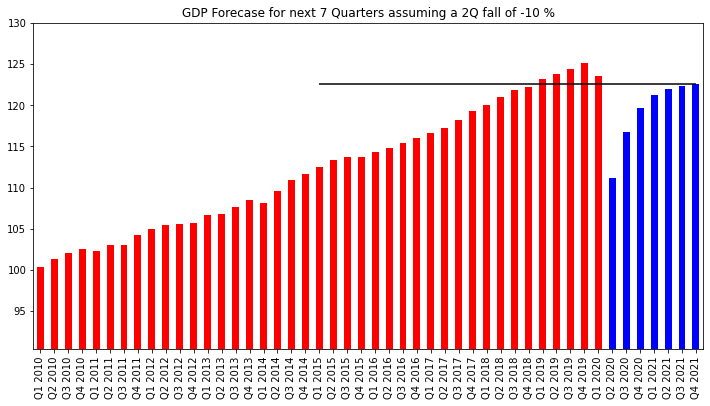

In [113]:
simulategdp(-10)

A 20% fall will set us back to Q4 2017

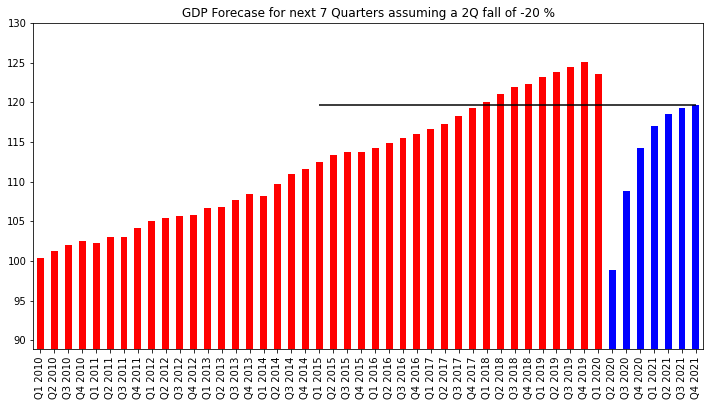

In [114]:
simulategdp(-20)

A 30% fall will set us back to Q1 2016

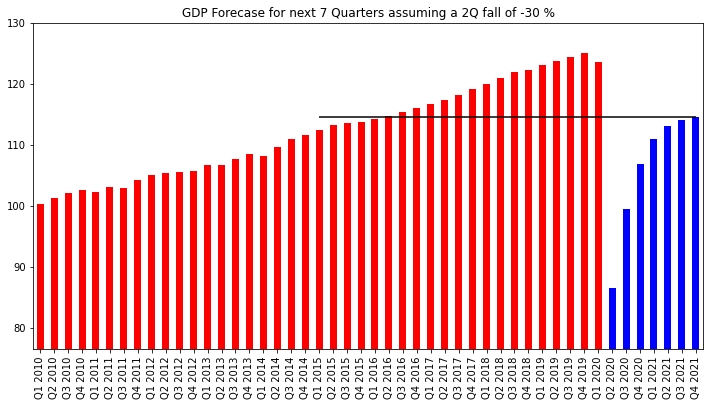

In [115]:
simulategdp(-30)

A 40% drop will set us back to Q3 2013. 

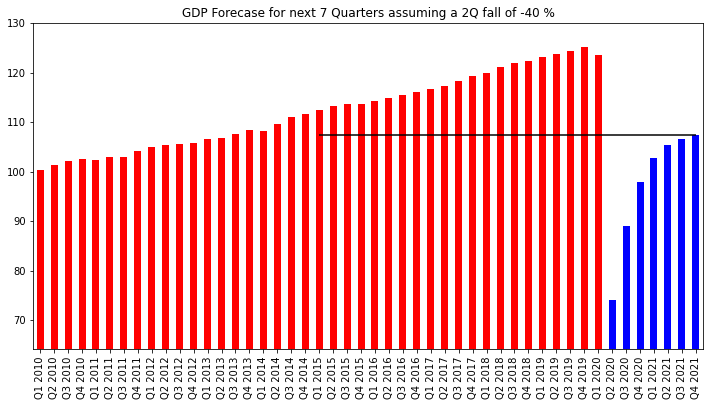

In [116]:
simulategdp(-40)